In [233]:
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from IPython.display import display
from sklearn.neural_network import MLPClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [232]:
# Data manipulation
import pandas as pd
import numpy as np


# Splitting data
from sklearn.model_selection import train_test_split

In [195]:
from scipy import stats
from scipy import spatial
from gensim.models import KeyedVectors

In [223]:
word2vec = KeyedVectors.load_word2vec_format('../word2vec/W2V_150.txt', binary=False)      
#test embedding
print(word2vec['a_dua'])
import random
print(np.random.randn(150))

[-1.096853    0.1238883   1.713642    2.17519    -0.5785002  -2.027245
  0.4998034  -0.7409065  -1.753515   -1.095152    0.7456962   1.484329
  1.235524    1.025137   -0.4033328  -0.9089296  -0.2022127   0.9581299
  0.6957457   1.385916    0.4481485   1.238998    0.1075599   3.29651
  1.315556    0.4587597   2.277924   -1.313732    0.9624746  -0.2428055
 -0.9468833   0.8783497   0.3211554  -0.5890836   0.9027938  -1.178614
 -0.7399899  -1.011717    1.766519   -2.162154    0.9139196  -2.295288
 -1.206698   -2.222441   -1.830276   -0.4457759   1.122905    0.3227312
 -0.03411892 -0.7967375   0.1875879   0.3892174  -0.7192345  -0.5432259
 -0.6546717  -0.7268866   0.5100322   0.9201084   0.2751797   1.194452
  0.5092697  -0.3654743  -1.434594   -1.484043    1.105507    0.02227577
 -1.812047   -1.204937   -3.369251    0.6383803   0.1732161  -0.478294
 -0.5762202   0.1084443  -0.1128882   0.647718   -0.3459211   0.5320156
  0.239954   -2.538636   -0.7471865   1.441165    0.02344817 -0.9431902

In [215]:
class EmbGetter:
    def __init__(self, model):
        self.model = model
        self.emb_dim = model["a_dua"].shape[0]
    def get(self, s):
        if s in model:
            return model[s]
        else:
            return np.random.randn(self.emb_dim)
    def contains(self, s):
        return s in self.model
    
emb_getter = EmbGetter(word2vec)

In [257]:
def pearson(e1, e2):
    return stats.pearsonr(e1, e2)[0]

def spearman_rank(e1, e2):
    return stats.spearmanr(e1, e2)[0]

def dot_product(e1, e2):
    return np.dot(e1, e2)

def euclidean(e1, e2):
    return 1 - spatial.distance.euclidean(e1, e2)

def make_feature(input_table):
    features = input_table.copy()
    features['first_emb'] = features.apply(lambda row: get_emb(row['Word1']), axis=1)
    features['second_emb'] = features.apply(lambda row: get_emb(row['Word2']), axis=1)
    features['cos'] = features.apply(lambda row: 1 - spatial.distance.cosine(row['first_emb'], row['second_emb']), axis=1)
    features['norm_of_diff'] = features.apply(lambda row: np.linalg.norm(row['first_emb'] - row['second_emb']), axis=1)
    features['pearson'] = features.apply(lambda row: pearson(row['first_emb'], row['second_emb']), axis=1)
    features['spearman_rank'] = features.apply(lambda row: spearman_rank(row['first_emb'], row['second_emb']), axis=1)
    features['dot_product'] = features.apply(lambda row: dot_product(row['first_emb'], row['second_emb']), axis=1)
    features['euclidean'] = features.apply(lambda row: euclidean(row['first_emb'], row['second_emb']), axis=1)
    features['emb_miss'] = features.apply(lambda row: 0 if (emb_getter.contains(row['Word1']) and emb_getter.contains(row['Word2'])) else 1, axis=1)
    return features


In [258]:
# load test data
p1 = pd.read_table("../datasets/ViCon-400/400_noun_pairs.txt", sep="\t")
p2 = pd.read_table("../datasets/ViCon-400/400_verb_pairs.txt", sep="\t")
p3 = pd.read_table("../datasets/ViCon-400/600_adj_pairs.txt", sep="\t")

test_data = pd.concat([p1, p2, p3])

test_data['label'] = test_data.apply(lambda row: 1 if row['Relation'] == 'ANT' else 0, axis=1)
test_data = test_data.reset_index().drop(columns = ['Relation', 'index'])
display(test_data)
test_features = make_feature(test_data)
display(test_features)
X_test = test_features.drop(columns=["Word1", "Word2", "first_emb", "second_emb", "label"])
y_test = np.array(test_features['label'].astype(np.int32)).reshape((-1, ))
display(X_test)

,Word1,Word2,label
0,khoái_lạc,nỗi_đau,1
1,yếu_kém,sức_mạnh,1
2,thanh_danh,ô_nhục,1
3,dây,dọc,0
4,bằng_cớ,chứng_cớ,0
...,...,...,...
1395,ấm_áp,lạnh_lẽo,1
1396,mập,ngẳng,1
1397,chóng,lâu,1
1398,chậm,sớm,1


,Word1,Word2,label,first_emb,second_emb,cos,norm_of_diff,pearson,spearman_rank,dot_product,euclidean,emb_miss
0,khoái_lạc,nỗi_đau,1,"[0.4649678, -0.5800779, -1.960368, -0.103116, ...","[1.001201, 0.872957, -0.5544619, 0.4246479, 2....",0.245766,16.834578,0.249734,0.271264,40.296856,-15.834578,0
1,yếu_kém,sức_mạnh,1,"[1.113018, 1.765621, 0.1503256, -0.8590851, -1...","[2.196333, 0.02373108, 0.8439404, 0.7745142, 1...",0.171372,18.374029,0.171366,0.166683,34.760422,-17.374029,0
2,thanh_danh,ô_nhục,1,"[0.03739062, 0.722598, 0.4939006, 1.180972, -0...","[-0.8631409, 0.5506324, 0.3692417, -0.00953786...",0.088986,16.266695,0.088963,0.034229,12.025043,-15.266695,0
3,dây,dọc,0,"[-0.8103815, -0.3776387, 1.287937, 1.714588, 0...","[1.430362, 0.1082051, -0.4619713, -0.4967797, ...",0.141662,16.180637,0.150397,0.135496,21.552877,-15.180637,0
4,bằng_cớ,chứng_cớ,0,"[-0.23188267551574965, 0.8341998794195624, -0....","[0.4331858, -0.3962619, -0.04544367, -0.427365...",-0.124852,22.644168,-0.131153,-0.147287,-28.166054,-21.644168,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1395,ấm_áp,lạnh_lẽo,1,"[1.809414, -1.692015, -0.1252984, 1.332432, 1....","[0.952939, -0.2322295, -0.920751, 0.0289777, 2...",0.629572,12.678332,0.628367,0.613533,136.498199,-11.678332,0
1396,mập,ngẳng,1,"[1.486078, 1.108144, 1.496801, 1.327039, 0.951...","[0.09084486360508724, -0.6646046614044339, -0....",0.071108,18.237618,0.067257,0.057441,12.666329,-17.237618,1
1397,chóng,lâu,1,"[0.999721, -1.571221, 0.7342855, -0.8737525, -...","[-0.2226935, 0.6123096, 1.956545, 0.944621, -0...",0.075829,21.526340,0.086772,0.106567,19.005964,-20.526340,0
1398,chậm,sớm,1,"[1.008996, 0.9679081, -1.912266, 1.533196, -0....","[0.7396746, -0.6514262, -0.6998218, -0.4177481...",0.415295,14.935099,0.414778,0.404510,75.847366,-13.935099,0


,cos,norm_of_diff,pearson,spearman_rank,dot_product,euclidean,emb_miss
0,0.245766,16.834578,0.249734,0.271264,40.296856,-15.834578,0
1,0.171372,18.374029,0.171366,0.166683,34.760422,-17.374029,0
2,0.088986,16.266695,0.088963,0.034229,12.025043,-15.266695,0
3,0.141662,16.180637,0.150397,0.135496,21.552877,-15.180637,0
4,-0.124852,22.644168,-0.131153,-0.147287,-28.166054,-21.644168,1
...,...,...,...,...,...,...,...
1395,0.629572,12.678332,0.628367,0.613533,136.498199,-11.678332,0
1396,0.071108,18.237618,0.067257,0.057441,12.666329,-17.237618,1
1397,0.075829,21.526340,0.086772,0.106567,19.005964,-20.526340,0
1398,0.415295,14.935099,0.414778,0.404510,75.847366,-13.935099,0


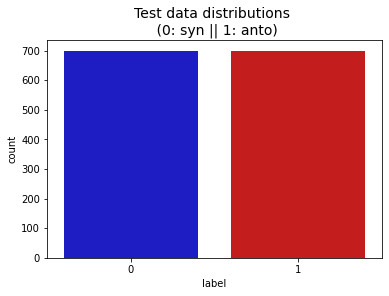

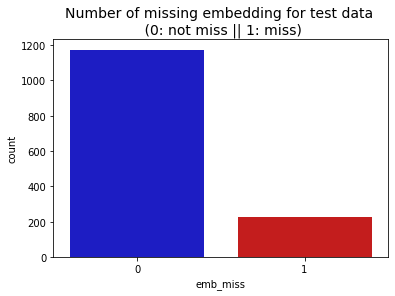

In [263]:
colors = ["#0101DF", "#DF0101"]

sns.countplot(x="label", data=test_data, palette=colors)
plt.title('Test data distributions \n (0: syn || 1: anto)', fontsize=14)
plt.show()

sns.countplot(x="emb_miss", data=test_features, palette=colors)
plt.title('Number of missing embedding for test data \n (0: not miss || 1: miss)', fontsize=14)
plt.show()

In [260]:

#load train data
anto = pd.read_table("../antonym-synonym set/Antonym_vietnamese.txt", sep=" ", header=None)
syn = pd.read_table("../antonym-synonym set/Synonym_vietnamese.txt", sep=" ", header=None)
display(anto.tail())
display(syn.tail())
anto["label"] = 1
syn["label"] = 0
data = pd.concat([syn, anto])
data.columns = ["Word1", "Word2", "label"]

# REMOVE LEAKAGE DATA
data = data[~data.set_index(['Word1','Word2']).index.isin(test_features.set_index(['Word1','Word2']).index)].reset_index().drop(columns="index")
features = make_feature(data)
X = features.drop(columns=["Word1", "Word2", "first_emb", "second_emb", "label"])
y = np.array(features['label'].astype(np.int32)).reshape((-1, ))

display(X)

,0,1
1995,bẩn_thỉu,sạch_sẽ
1996,bận,rảnh
1997,bận,rảnh_rang
1998,bận,rảnh_rỗi
1999,bận,rỗi


,0,1
11557,yêu_mến,mến_yêu
11558,yêu_quí,yêu_quý
11559,yêu_thương,thương_yêu
11560,yếu_tố,nguyên_tố
11561,yếu_tố,nhân_tố


,cos,norm_of_diff,pearson,spearman_rank,dot_product,euclidean,emb_miss
0,0.099578,17.177438,0.103000,0.120878,15.997678,-16.177438,1
1,0.288864,14.071492,0.287837,0.272092,34.252293,-13.071491,0
2,-0.088706,20.127966,-0.088719,-0.074615,-16.464065,-19.127966,1
3,-0.117916,15.525453,-0.118739,-0.119129,-12.063567,-14.525453,1
4,-0.095220,15.275658,-0.096237,-0.088656,-8.579754,-14.275658,1
...,...,...,...,...,...,...,...
11599,0.044962,17.528137,0.053884,0.080386,5.950936,-16.528139,0
11600,-0.111619,18.748727,-0.113353,-0.103718,-17.176665,-17.748727,1
11601,0.471292,18.200443,0.471963,0.438350,146.509811,-17.200443,0
11602,0.479427,18.138960,0.479693,0.475966,150.581177,-17.138960,0


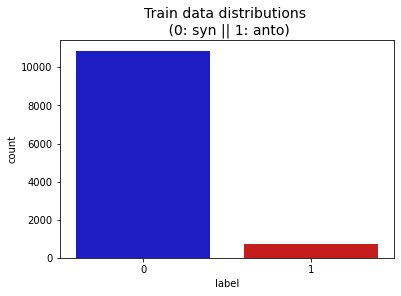

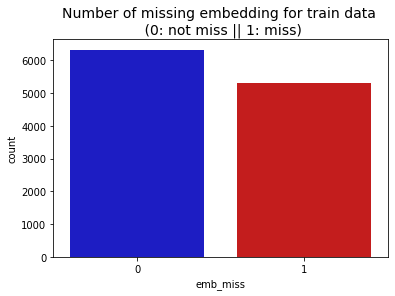

In [264]:
colors = ["#0101DF", "#DF0101"]

sns.countplot(x="label", data=data, palette=colors)
plt.title('Train data distributions \n (0: syn || 1: anto)', fontsize=14)
plt.show()

sns.countplot(x="emb_miss", data=X, palette=colors)
plt.title('Number of missing embedding for train data \n (0: not miss || 1: miss)', fontsize=14)
plt.show()

In [276]:
from sklearn.linear_model import *
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import random 

kf = KFold(n_splits=10, shuffle=True)

cnt = 1
'''
clf = MLPClassifier(hidden_layer_sizes=(2, 1), 
                                       solver='adam', 
                                       learning_rate='invscaling', 
                                       learning_rate_init=0.2,
                                      max_iter=1000)
'''
clfs = [make_pipeline(StandardScaler(), LogisticRegression(solver="liblinear", max_iter=10000, class_weight="balanced",random_state=random.randint(0, 10000)))] * kf.n_splits               
result = list()

for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    clfs[cnt - 1].fit(X.iloc[train_index], y[train_index])
    score = f1_score(y[test_index], clfs[cnt - 1].predict(X.iloc[test_index]))
    print(score)
    result.append(score)
    cnt += 1


print("average F1-score: ", np.asarray(result).mean())

Fold:1, Train set: 10443, Test set:1161
0.21495327102803738
Fold:2, Train set: 10443, Test set:1161
0.19426048565121412
Fold:3, Train set: 10443, Test set:1161
0.2713347921225383
Fold:4, Train set: 10443, Test set:1161
0.21826280623608016
Fold:5, Train set: 10444, Test set:1160
0.19477434679334915
Fold:6, Train set: 10444, Test set:1160
0.23632385120350108
Fold:7, Train set: 10444, Test set:1160
0.24537037037037038
Fold:8, Train set: 10444, Test set:1160
0.20137299771167047
Fold:9, Train set: 10444, Test set:1160
0.19158878504672897
Fold:10, Train set: 10444, Test set:1160
0.19574468085106383
average F1-score:  0.21639863870145537


In [277]:
display(X_test)
np.set_printoptions(threshold=10000000)
for i in range(kf.n_splits):
    print(f1_score(y_test, clfs[i].predict(X_test)))
print(y_test)
print(clfs[0].predict(X_test))


,cos,norm_of_diff,pearson,spearman_rank,dot_product,euclidean,emb_miss
0,0.245766,16.834578,0.249734,0.271264,40.296856,-15.834578,0
1,0.171372,18.374029,0.171366,0.166683,34.760422,-17.374029,0
2,0.088986,16.266695,0.088963,0.034229,12.025043,-15.266695,0
3,0.141662,16.180637,0.150397,0.135496,21.552877,-15.180637,0
4,-0.124852,22.644168,-0.131153,-0.147287,-28.166054,-21.644168,1
...,...,...,...,...,...,...,...
1395,0.629572,12.678332,0.628367,0.613533,136.498199,-11.678332,0
1396,0.071108,18.237618,0.067257,0.057441,12.666329,-17.237618,1
1397,0.075829,21.526340,0.086772,0.106567,19.005964,-20.526340,0
1398,0.415295,14.935099,0.414778,0.404510,75.847366,-13.935099,0


0.7203114860480208
0.7203114860480208
0.7203114860480208
0.7203114860480208
0.7203114860480208
0.7203114860480208
0.7203114860480208
0.7203114860480208
0.7203114860480208
0.7203114860480208
[1 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 0
 1 1 0 1 1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 0 0 1 1 1 1 0 0 0
 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 1
 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0
 1 0 1 0 1 1 1 0 1 1 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 0 1
 0 1 1 0 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0
 0 1 1 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 1 0 1 0 1
 0 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0 1 1 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 1 1
 0 1 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 1
 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0 0 1
 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 1 0 1